In [1]:
#import packages 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#import datasets 

df= pd.read_csv('transfers.csv')
df_player_valuations = pd.read_csv('player_valuations.csv')
PLpoints2122 = pd.read_csv('PLpoints2122.csv')
PLpoints2223 = pd.read_csv('PLpoints2223.csv')
PLpoints2324 = pd.read_csv('PLpoints2324.csv')
PLpoints2425 = pd.read_csv('PLpoints2425.csv')

In [3]:
merged_df = df.merge(
    df_player_valuations,
    on='player_id',
    how='inner')

merged_df = merged_df.drop('transfer_date', axis=1)

merged_df 

,player_id,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur_x,player_name,date,market_value_in_eur_y,current_club_id,player_club_domestic_competition_id
0,16136,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante,2004-10-04,250000,417,FR1
1,16136,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante,2006-12-20,800000,417,FR1
2,16136,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante,2007-01-12,1000000,417,FR1
3,16136,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante,2007-08-07,1500000,417,FR1
4,16136,26/27,417,123,OGC Nice,Retired,NaN,500000.0,Dante,2008-07-15,2000000,417,FR1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483763,15570,01/02,14309,11755,Akademia CSKA,CSKA Moscow II,NaN,NaN,Igor Akinfeev,2022-11-21,2000000,2410,RU1
1483764,15570,01/02,14309,11755,Akademia CSKA,CSKA Moscow II,NaN,NaN,Igor Akinfeev,2023-06-14,2000000,2410,RU1
1483765,15570,01/02,14309,11755,Akademia CSKA,CSKA Moscow II,NaN,NaN,Igor Akinfeev,2023-12-13,1500000,2410,RU1
1483766,15570,01/02,14309,11755,Akademia CSKA,CSKA Moscow II,NaN,NaN,Igor Akinfeev,2024-06-04,1000000,2410,RU1


### View Brighton Transfers in

In [4]:
seasons = ['18/19','19/20','20/21','21/22', '22/23', '23/24', '24/25']
brighton_transfers = merged_df[
    (merged_df['to_club_name'] == 'Brighton') &
    (merged_df['transfer_season'].isin(seasons))]

# Filter for non-zero & non-NaN transfer fees
brighton_transfers_nonzero = brighton_transfers[
    (brighton_transfers['transfer_fee'] != 0) &
    (~brighton_transfers['transfer_fee'].isna())]

# Keep only the latest transfer record per player
brighton_transfers_in = (
    brighton_transfers_nonzero
    .sort_values('date', ascending=False)       # Make sure 'date' is your transfer date column
    .drop_duplicates(subset=['player_name'], keep='first'))

brighton_transfers_in

,player_id,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur_x,player_name,date,market_value_in_eur_y,current_club_id,player_club_domestic_competition_id
132316,1110406,24/25,2778,1237,Nordsjaelland,Brighton,19500000.0,12000000.0,Ibrahim Osman,2025-03-28,12000000,234,NL1
299325,339314,21/22,3948,1237,Union SG,Brighton,7000000.0,5000000.0,Deniz Undav,2025-03-27,22000000,79,L1
127815,849410,23/24,189,1237,Boca Juniors,Brighton,9150000.0,13000000.0,Valentín Barco,2025-03-24,8000000,667,FR1
43246,217115,19/20,1148,1237,Brentford,Brighton,15560000.0,12000000.0,Neal Maupay,2025-03-24,10000000,244,FR1
356487,554284,21/22,324,1237,Pogon Szczecin,Brighton,11000000.0,10000000.0,Kacper Kozlowski,2025-03-20,4200000,2832,TR1
210676,996897,24/25,69261,1237,Miami,Brighton,13000000.0,12000000.0,Diego Gómez,2025-03-18,13000000,1237,GB1
773065,667287,22/23,272,1237,AIK,Brighton,4000000.0,4000000.0,Yasin Ayari,2025-03-18,17000000,1237,GB1
1267561,410425,18/19,1082,1237,LOSC Lille,Brighton,16800000.0,8000000.0,Yves Bissouma,2025-03-18,28000000,148,GB1
701888,1012534,24/25,762,1237,Newcastle,Brighton,35000000.0,16000000.0,Yankuba Minteh,2025-03-18,30000000,1237,GB1
442853,415381,24/25,234,1237,Feyenoord,Brighton,32000000.0,30000000.0,Mats Wieffer,2025-03-18,27000000,1237,GB1


### View Brighton Transfers out

In [5]:
seasons = ['18/19','19/20','20/21','21/22', '22/23', '23/24', '24/25']
brighton_transfers = merged_df[
    (merged_df['from_club_name'] == 'Brighton') &
    (merged_df['transfer_season'].isin(seasons))]

# Filter for non-zero & non-NaN transfer fees
brighton_transfers_nonzero = brighton_transfers[
    (brighton_transfers['transfer_fee'] != 0) &
    (~brighton_transfers['transfer_fee'].isna())]

# Keep only the latest transfer record per player
brighton_transfers_out = (
    brighton_transfers_nonzero
    .sort_values('date', ascending=False)       # Make sure 'date' is your transfer date column
    .drop_duplicates(subset=['player_name'], keep='first'))

brighton_transfers_out

,player_id,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur_x,player_name,date,market_value_in_eur_y,current_club_id,player_club_domestic_competition_id
299175,339314,24/25,1237,79,Brighton,VfB Stuttgart,26700000.0,25000000.0,Deniz Undav,2025-03-27,22000000,79,L1
43215,217115,22/23,1237,29,Brighton,Everton,11800000.0,18000000.0,Neal Maupay,2025-03-24,10000000,244,FR1
356412,554284,24/25,1237,2832,Brighton,Gaziantep FK,200000.0,5000000.0,Kacper Kozlowski,2025-03-20,4200000,2832,TR1
1098023,534033,23/24,1237,31,Brighton,Liverpool,42000000.0,65000000.0,Alexis Mac Allister,2025-03-18,90000000,31,GB1
1267536,410425,22/23,1237,148,Brighton,Tottenham,29200000.0,35000000.0,Yves Bissouma,2025-03-18,28000000,148,GB1
1320429,335721,21/22,1237,11,Brighton,Arsenal,58500000.0,28000000.0,Ben White,2025-03-18,50000000,11,GB1
314088,82873,24/25,1237,16,Brighton,Bor. Dortmund,7000000.0,8000000.0,Pascal Groß,2024-12-20,7000000,16,L1
1002349,325443,21/22,1237,990,Brighton,Coventry,1200000.0,1000000.0,Viktor Gyökeres,2024-12-19,75000000,336,PO1
258191,423744,24/25,1237,6195,Brighton,Napoli,14000000.0,18000000.0,Billy Gilmour,2024-12-18,16000000,6195,IT1
218190,213268,21/22,1237,234,Brighton,Feyenoord,1000000.0,5000000.0,Alireza Jahanbakhsh,2024-12-17,2300000,306,NL1


### View Profit of Sold Brighton Players 

In [6]:
# Merge Dataframes
Brighton_all_transfers = brighton_transfers_in.merge(
    brighton_transfers_out,
    on='player_id',
    how='inner')


# Drop unwanted columns 
Brighton_all_transfers = Brighton_all_transfers.drop(
    ['from_club_id_x', 'to_club_id_x', 
     'player_club_domestic_competition_id_x', 
     'player_club_domestic_competition_id_y', 'market_value_in_eur_x_y',
     'market_value_in_eur_y_y','current_club_id_y', 'date_x', 'date_y', 
     'from_club_id_y','to_club_id_y','player_name_y','player_id','current_club_id_x'], 
    axis=1)

# Add Profit column
Brighton_all_transfers['Profit'] = Brighton_all_transfers['transfer_fee_y'] - Brighton_all_transfers['transfer_fee_x']

# Add Increase in Market Value
Brighton_all_transfers['Mkt_value_increase'] = Brighton_all_transfers['market_value_in_eur_y_x'] - Brighton_all_transfers['market_value_in_eur_x_x']

pd.set_option('display.max_columns', None)

Brighton_all_transfers

,transfer_season_x,from_club_name_x,to_club_name_x,transfer_fee_x,market_value_in_eur_x_x,player_name_x,market_value_in_eur_y_x,transfer_season_y,from_club_name_y,to_club_name_y,transfer_fee_y,Profit,Mkt_value_increase
0,21/22,Union SG,Brighton,7000000.0,5000000.0,Deniz Undav,22000000,24/25,Brighton,VfB Stuttgart,26700000.0,19700000.0,17000000.0
1,19/20,Brentford,Brighton,15560000.0,12000000.0,Neal Maupay,10000000,22/23,Brighton,Everton,11800000.0,-3760000.0,-2000000.0
2,21/22,Pogon Szczecin,Brighton,11000000.0,10000000.0,Kacper Kozlowski,4200000,24/25,Brighton,Gaziantep FK,200000.0,-10800000.0,-5800000.0
3,18/19,LOSC Lille,Brighton,16800000.0,8000000.0,Yves Bissouma,28000000,22/23,Brighton,Tottenham,29200000.0,12400000.0,20000000.0
4,18/19,Argentinos Jrs.,Brighton,8000000.0,5000000.0,Alexis Mac Allister,90000000,23/24,Brighton,Liverpool,42000000.0,34000000.0,85000000.0
5,22/23,Chelsea,Brighton,8300000.0,12000000.0,Billy Gilmour,16000000,24/25,Brighton,Napoli,14000000.0,5700000.0,4000000.0
6,18/19,AZ Alkmaar,Brighton,22500000.0,18000000.0,Alireza Jahanbakhsh,2300000,21/22,Brighton,Feyenoord,1000000.0,-21500000.0,-15700000.0
7,20/21,Independiente,Brighton,28200000.0,5000000.0,Moisés Caicedo,80000000,23/24,Brighton,Chelsea,116000000.0,87800000.0,75000000.0
8,20/21,Lech Poznan,Brighton,11000000.0,3000000.0,Jakub Moder,10000000,24/25,Brighton,Feyenoord,1500000.0,-9500000.0,7000000.0
9,18/19,Wigan,Brighton,3550000.0,750000.0,Dan Burn,7000000,21/22,Brighton,Newcastle,15000000.0,11450000.0,6250000.0


### Brighton Top Players Sold 

#### Neal Maupay 

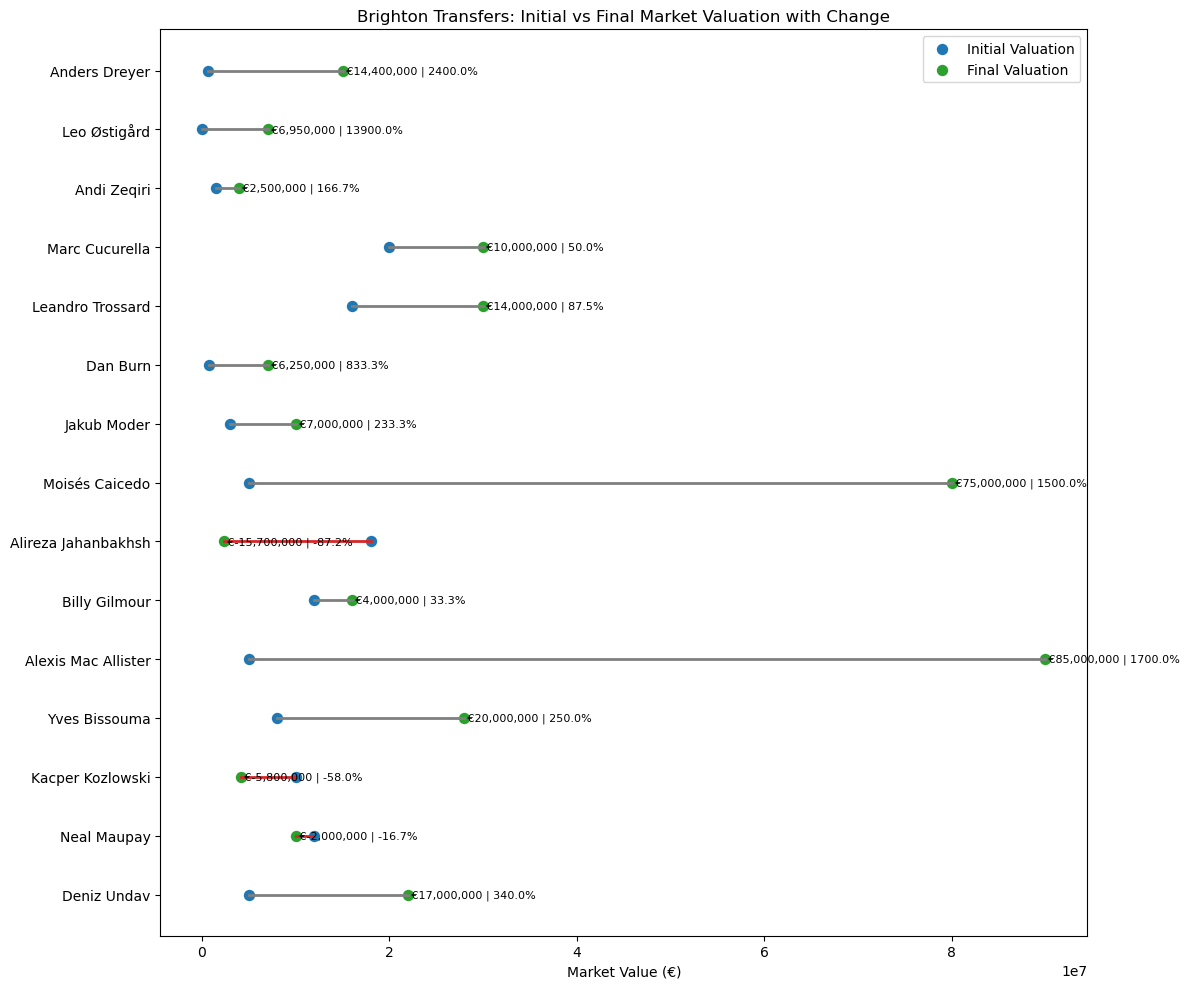

In [7]:
# Extract values
before_vals = Brighton_all_transfers['market_value_in_eur_x_x']
after_vals = Brighton_all_transfers['market_value_in_eur_y_x']
labels = Brighton_all_transfers['player_name_x']

# Calculate change & percentage change
change_vals = after_vals - before_vals
pct_change = (change_vals / before_vals) * 100

# Y positions
y = range(len(Brighton_all_transfers))
plt.figure(figsize=(12, 0.4 * len(Brighton_all_transfers) + 4))

#lines (color based on gain/loss)
for yi, start, end in zip(y, before_vals, after_vals):
    color = 'tab:grey' if end > start else 'tab:red'
    plt.plot([start, end], [yi, yi], color=color, linewidth=2)


plt.scatter(before_vals, y, s=90, color='tab:blue', edgecolors='white', linewidth=1.3, label='Initial Valuation')
plt.scatter(after_vals, y, s=90, color='tab:green', edgecolors='white', linewidth=1.3, label='Final Valuation')

# Annotate change & %
for yi, change, pct, end in zip(y, change_vals, pct_change, after_vals):
    plt.text(end, yi, f" €{change:,.0f} | {pct:.1f}%", va='center', ha='left', fontsize=8)

# Labels
plt.yticks(list(y), labels)
plt.xlabel('Market Value (€)')
plt.title('Brighton Transfers: Initial vs Final Market Valuation with Change')
plt.legend()
plt.tight_layout()
plt.show()



#### Average % Change in Valuation

In [8]:
# % change in market value = (After - Before) / Before * 100
Brighton_all_transfers['Valuation_change_pct'] = (
    (Brighton_all_transfers['market_value_in_eur_y_x'] - Brighton_all_transfers['market_value_in_eur_x_x'])
    / Brighton_all_transfers['market_value_in_eur_x_x']
) * 100

# Average % change
avg_pct_change = Brighton_all_transfers['Valuation_change_pct'].mean()

print(f"Average % Change in Valuation: {avg_pct_change:.2f}%")


Average % Change in Valuation: 1422.15%


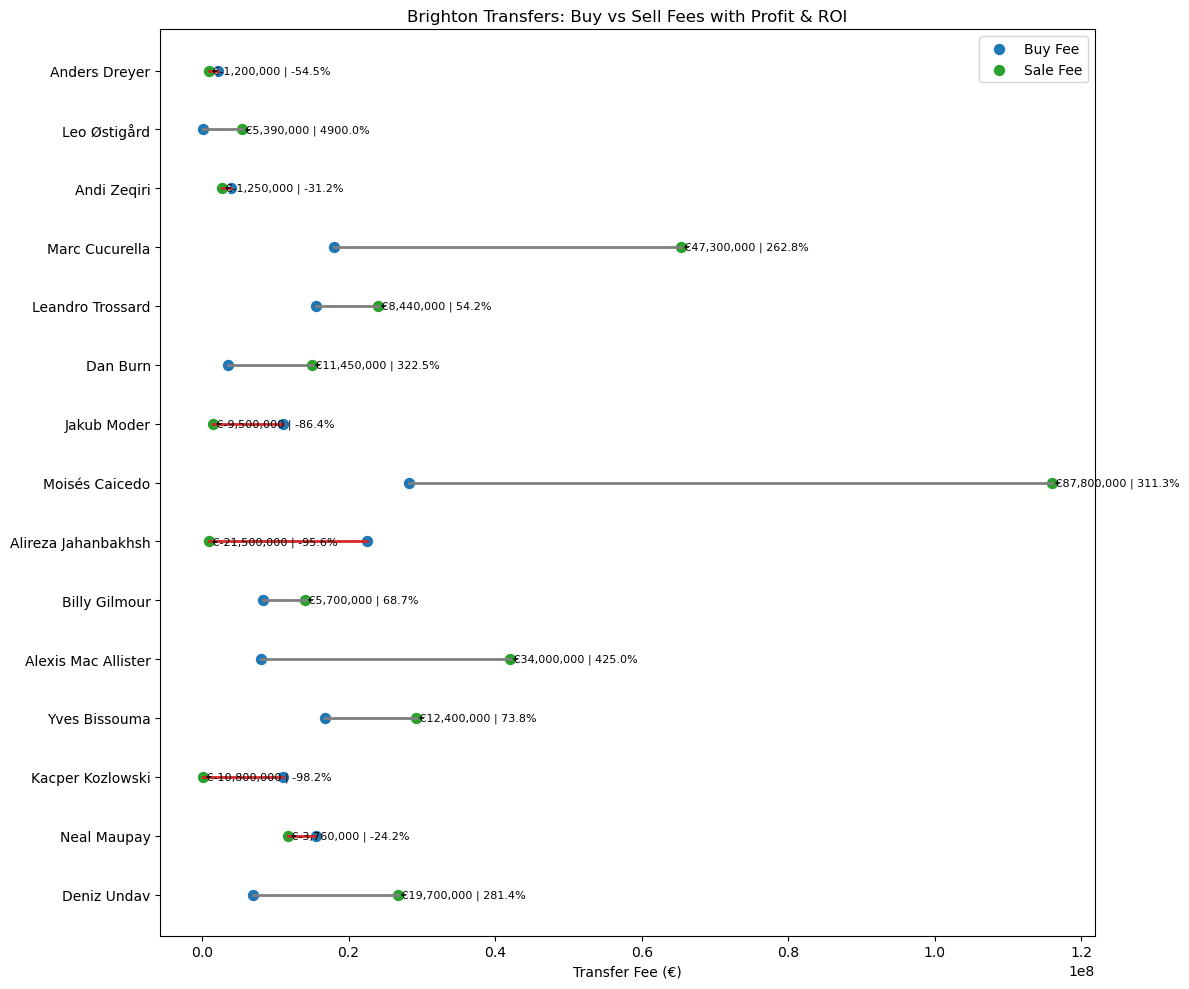

In [9]:
# Extract values
buy_fee  = Brighton_all_transfers['transfer_fee_x']
sale_fee = Brighton_all_transfers['transfer_fee_y']
labels   = Brighton_all_transfers['player_name_x']

# Compute profit & ROI
profit   = sale_fee - buy_fee
roi_pct  = (profit / buy_fee) * 100  # % return on the original fee

# Y positions
y = range(len(Brighton_all_transfers))

plt.figure(figsize=(12, 0.4 * len(Brighton_all_transfers) + 4))

# Connecting lines (green if profit, red if loss)
for yi, b, s in zip(y, buy_fee, sale_fee):
    color = 'tab:grey' if s >= b else 'tab:red'
    plt.plot([b, s], [yi, yi], color=color, linewidth=2)


plt.scatter(buy_fee,  y, s=90, color='tab:blue',  edgecolors='white', linewidth=1.3, label='Buy Fee')
plt.scatter(sale_fee, y, s=90, color='tab:green', edgecolors='white', linewidth=1.3, label='Sale Fee')

# Annotate profit and ROI at the sale point
for yi, s, p, r in zip(y, sale_fee, profit, roi_pct):
    plt.text(s, yi, f" €{p:,.0f} | {r:.1f}%", va='center', ha='left', fontsize=8)

# Labels
plt.yticks(list(y), labels)
plt.xlabel('Transfer Fee (€)')
plt.title('Brighton Transfers: Buy vs Sell Fees with Profit & ROI')
plt.legend()
plt.tight_layout()
plt.show()


#### Average Return on Investment 

In [10]:
# ROI = (Sale Fee - Buy Fee) / Buy Fee
Brighton_all_transfers['ROI_pct'] = (
    (Brighton_all_transfers['transfer_fee_y'] - Brighton_all_transfers['transfer_fee_x']) 
    / Brighton_all_transfers['transfer_fee_x']
) * 100

# Average ROI across all transfers
avg_roi = Brighton_all_transfers['ROI_pct'].mean()

print(f"Average ROI: {avg_roi:.2f}%")


Average ROI: 420.65%


In [17]:
clubs = [
    "Liverpool", "Arsenal", "Man City", "Chelsea", "Newcastle",
    "Aston Villa", "Nottm Forest", "Brighton", "Bournemouth",
    "Brentford", "Fulham", "Crystal Palace", "Everton", "West Ham",
    "Man Utd", "Wolves", "Tottenham",
    "Leicester", "Ipswich", "Southampton"
]

seasons = ['18/19','19/20','20/21','21/22','22/23','23/24','24/25']

all_club_frames = []

for club in clubs:
    # IN: players joining this club (your exact filtering steps)
    club_in = merged_df[
        (merged_df['to_club_name'] == club) &
        (merged_df['transfer_season'].isin(seasons))
    ].copy()
    club_in = club_in[
        (club_in['transfer_fee'] != 0) &
        (~club_in['transfer_fee'].isna())
    ]
    club_in = (
        club_in.sort_values('date', ascending=False)
               .drop_duplicates(subset=['player_name'], keep='first')
    )

    # OUT: players leaving this club (your exact filtering steps)
    club_out = merged_df[
        (merged_df['from_club_name'] == club) &
        (merged_df['transfer_season'].isin(seasons))
    ].copy()
    club_out = club_out[
        (club_out['transfer_fee'] != 0) &
        (~club_out['transfer_fee'].isna())
    ]
    club_out = (
        club_out.sort_values('date', ascending=False)
                .drop_duplicates(subset=['player_name'], keep='first')
    )

    # Merge the two (same as you did)
    club_merged = club_in.merge(
        club_out,
        on='player_id',
        how='inner',
        suffixes=('_in', '_out')
    )

    if not club_merged.empty:
        club_merged['Club'] = club
        all_club_frames.append(club_merged)

# Final combined dataframe across all
all_clubs_transfers = pd.concat(all_club_frames, ignore_index=True)

all_clubs_transfers


,player_id,transfer_season_in,from_club_id_in,to_club_id_in,from_club_name_in,to_club_name_in,transfer_fee_in,market_value_in_eur_x_in,player_name_in,date_in,market_value_in_eur_y_in,current_club_id_in,player_club_domestic_competition_id_in,transfer_season_out,from_club_id_out,to_club_id_out,from_club_name_out,to_club_name_out,transfer_fee_out,market_value_in_eur_x_out,player_name_out,date_out,market_value_in_eur_y_out,current_club_id_out,player_club_domestic_competition_id_out,Club
0,541231,19/20,1269,31,PEC Zwolle,Liverpool,1900000.0,2000000.0,Sepp van den Berg,2025-03-18,20000000,1148,GB1,24/25,31,1148,Liverpool,Brentford,23600000.0,12000000.0,Sepp van den Berg,2025-03-18,20000000,1148,GB1,Liverpool
1,559263,22/23,931,31,Fulham,Liverpool,9400000.0,12000000.0,Fábio Carvalho,2025-03-18,15000000,1148,GB1,24/25,31,1148,Liverpool,Brentford,23400000.0,14000000.0,Fábio Carvalho,2025-03-18,15000000,1148,GB1,Liverpool
2,165793,19/20,409,31,RB Salzburg,Liverpool,8500000.0,12500000.0,Takumi Minamino,2024-12-10,15000000,162,FR1,22/23,31,162,Liverpool,Monaco,15000000.0,12000000.0,Takumi Minamino,2024-12-10,15000000,162,FR1,Liverpool
3,257097,20/21,466,31,Preston,Liverpool,1850000.0,2400000.0,Ben Davies,2024-05-30,3000000,124,SC1,22/23,31,124,Liverpool,Rangers,4700000.0,2500000.0,Ben Davies,2024-05-30,3000000,124,SC1,Liverpool
4,318077,18/19,1038,11,Sampdoria,Arsenal,28650000.0,30000000.0,Lucas Torreira,2025-03-20,13000000,141,TR1,22/23,11,141,Arsenal,Galatasaray,6000000.0,20000000.0,Lucas Torreira,2025-03-20,13000000,141,TR1,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,557612,22/23,40,180,G. Bordeaux,Southampton,11500000.0,3000000.0,Sékou Mara,2024-12-10,6000000,667,FR1,24/25,180,667,Southampton,R. Strasbourg,12000000.0,6000000.0,Sékou Mara,2024-12-10,6000000,667,FR1,Southampton
127,563963,20/21,366,180,Real Valladolid,Southampton,12000000.0,12000000.0,Mohammed Salisu,2024-12-10,15000000,162,FR1,23/24,180,162,Southampton,Monaco,15000000.0,18000000.0,Mohammed Salisu,2024-12-10,15000000,162,FR1,Southampton
128,238266,22/23,244,180,Marseille,Southampton,8000000.0,16000000.0,Duje Caleta-Car,2024-12-10,8000000,1041,FR1,24/25,180,1041,Southampton,Olympique Lyon,3590000.0,7000000.0,Duje Caleta-Car,2024-12-10,8000000,1041,FR1,Southampton
129,748319,22/23,1444,180,Racing Club,Southampton,13650000.0,8500000.0,Carlos Alcaraz,2024-12-09,14000000,29,GB1,24/25,180,614,Southampton,Flamengo,18000000.0,15000000.0,Carlos Alcaraz,2024-12-09,14000000,29,GB1,Southampton


In [21]:
# Calculate ROI % for each player transfer
all_clubs_transfers['ROI_pct'] = (
    (all_clubs_transfers['transfer_fee_out'] - all_clubs_transfers['transfer_fee_in']) /
    all_clubs_transfers['transfer_fee_in']) * 100

# Calculate valuation change % for each player transfer
all_clubs_transfers['Valuation_change_pct'] = (
    (all_clubs_transfers['market_value_in_eur_y_in'] - all_clubs_transfers['market_value_in_eur_x_in']) /
    all_clubs_transfers['market_value_in_eur_x_in']) * 100

# Group by Club and take average
club_summary = (
    all_clubs_transfers.groupby('Club')[['ROI_pct', 'Valuation_change_pct']]
    .mean()
    .reset_index())

# Round to 2 decimal places
club_summary['ROI_pct'] = club_summary['ROI_pct'].round(2)
club_summary['Valuation_change_pct'] = club_summary['Valuation_change_pct'].round(2)

# Sort by ROI if desired
club_summary = club_summary.sort_values('ROI_pct', ascending=False)

club_summary


,Club,ROI_pct,Valuation_change_pct
3,Brentford,598.60,2827.92
4,Brighton,420.65,1422.15
10,Liverpool,380.39,242.50
6,Crystal Palace,216.39,140.85
7,Everton,171.67,42.38
18,Wolves,135.48,246.57
14,Nottm Forest,130.76,33.58
11,Man City,108.71,395.04
13,Newcastle,104.18,419.17
8,Fulham,60.72,65.56


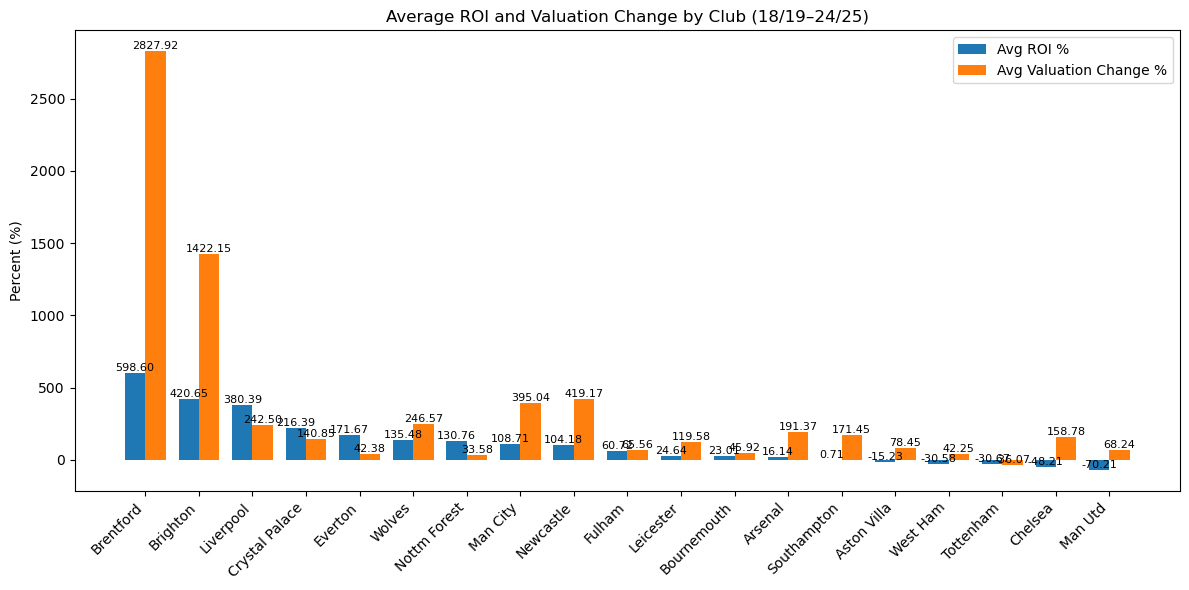

In [20]:
# If not already sorted, sort by ROI to make it easier to read
df = club_summary.sort_values('ROI_pct', ascending=False).reset_index(drop=True)

x = np.arange(len(df))
width = 0.38

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, df['ROI_pct'], width, label='Avg ROI %')
bars2 = plt.bar(x + width/2, df['Valuation_change_pct'], width, label='Avg Valuation Change %')

plt.xticks(x, df['Club'], rotation=45, ha='right')
plt.ylabel('Percent (%)')
plt.title('Average ROI and Valuation Change by Club (18/19–24/25)')
plt.legend()
plt.tight_layout()

# Optional: annotate values on bars (2 decimals)
for b in list(bars1) + list(bars2):
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f'{h:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()